## Create Heatmaps
### Goals
1. Create big dataframe of all enrichment scores of all the data I have so far
2. Play around with plotly heatmaps
3. Create a function to make heatmap for any genes

### Part 1: Create big df and save on server

Traverse `~/output _072321` to extract gene summary tables for each virus

In [2]:
import os
import pandas as pd
import numpy as np

In [4]:
os.chdir('/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_072321/DENV/rra')
DENV = pd.read_csv('DENV.gene_summary.txt', delimiter = "\t")

os.chdir('/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_072321/EV/rra')
EV = pd.read_csv('EV.gene_summary.txt', delimiter = "\t")

os.chdir('/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_072321/HAV/rra')
HAV = pd.read_csv('HAV.gene_summary.txt', delimiter = "\t")

os.chdir('/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_072321/HCV/rra')
HCV = pd.read_csv('HCV.gene_summary.txt', delimiter = "\t")

os.chdir('/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_072321/RV/rra')
RV = pd.read_csv('RV.gene_summary.txt', delimiter = "\t")

os.chdir('/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_072321/Wang_OC43/rra')
wang_OC43 = pd.read_csv('Wang_OC43.gene_summary.txt', delimiter = "\t")

os.chdir('/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_072321/Wang_229E/rra')
wang_229E = pd.read_csv('Wang_229E.gene_summary.txt', delimiter = "\t")

os.chdir('/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_072321/Wang_SARS-CoV2/rra')
wang_SARS_COV2 = pd.read_csv('Wang_SARS-CoV2.gene_summary.txt', delimiter = "\t")


In [5]:
os.chdir('/mnt/ibm_lg/jacklyn.luu/nextflow_output/schneider_output/rra')
NL_63 = pd.read_csv('NL63.gene_summary.txt', delimiter = "\t")
sch_OC43 = pd.read_csv('OC43.gene_summary.txt', delimiter = "\t")
sch_229E = pd.read_csv('229E.gene_summary.txt', delimiter = "\t")
sch_SARS_COV2_33C = pd.read_csv('SARS-CoV2_33C.gene_summary.txt', delimiter = "\t")
sch_SARS_COV2_37C = pd.read_csv('SARS-CoV2_37C.gene_summary.txt', delimiter = "\t")

crispr_screen_ES_dict = {'DENV': DENV,
                    'EV': EV,
                    'HAV': HAV,
                    'HCV': HCV,
                    'RV': RV,
                    'HCoV 229E (Wang)': wang_229E, 
                    'HCoV OC43 (Wang)': wang_OC43,
                    'SARS_COV2 (Wang)': wang_SARS_COV2,
                    'HCoV NL_63': NL_63,
                    'HCoV 229E (Schneider)': sch_229E, 
                    'HCoV OC43 (Schneider)': sch_OC43,
                    'SARS_COV2_33C (Schneider)': sch_SARS_COV2_33C, 
                    'SARS_COV2_37C (Schneider)': sch_SARS_COV2_37C}


Create dataframe of enrichment scores. Save to server

In [6]:
from functools import reduce
def create_df_ES_RRA(data_list):
    """
    PURPOSE
    * This function will take in a dictionary of df's of gene_summary.txt files and extract the 
    pos|score values of the common genes. 
    
    INPUT
    * data_list: dictionary of df's of gene_summary.txt files that we want to compare, with key=name of data
    
    OUTPUT
    * result: dataframe of common genes, pos|scores of each gene_summary file
    """
    # Get common genes between the gene_summaries (in case they use different libraries)
    genes_lists = [data_list[key]['id'] for key in data_list.keys()]

    common_genes = reduce(np.intersect1d, genes_lists)
    
    result = pd.DataFrame(common_genes, columns = ['id'])
    
    # Go through each df and extract the pos_score and add to result df
    for key in data_list.keys():
        data_with_common_genes = data_list[key][data_list[key]['id'].isin(common_genes)]
        data_with_common_genes['-log(RRA score)'] = -np.log(data_with_common_genes['pos|score'])
        result = pd.merge(result,
                          data_with_common_genes[['id','-log(RRA score)']],
                          on = 'id')
        result.rename(columns={'-log(RRA score)': key}, inplace=True)
    return result

In [7]:
crispr_screen_ES = create_df_ES_RRA(crispr_screen_ES_dict)
#os.chdir('/mnt/ibm_lg/jacklyn.luu')
#crispr_screen_ES.to_csv('crispr_screens_ES_table.csv', sep=' ')

/home/jacklyn.luu/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


### Part 2: Play around with heat map

In [8]:
crispr_screen_ES

,id,DENV,EV,HAV,HCV,RV,HCoV 229E (Wang),HCoV OC43 (Wang),SARS_COV2 (Wang),HCoV NL_63,HCoV 229E (Schneider),HCoV OC43 (Schneider),SARS_COV2_33C (Schneider),SARS_COV2_37C (Schneider)
0,A1BG,0.425826,0.495215,0.534094,2.440354,0.311975,3.276982,2.019664,0.641105,0.163849,0.224883,0.054773,1.504853,1.439315
1,A1CF,2.374307,1.964257,17.796562,1.142972,0.659751,0.806495,0.229652,1.273752,0.819845,0.406571,1.423415,0.820526,0.784934
2,A2M,0.961184,0.230080,0.943456,1.950661,0.327574,3.716374,1.273502,1.541639,0.153734,3.302393,0.161167,0.323821,0.685159
3,A2ML1,0.229401,0.147236,0.804503,0.190955,0.100240,2.129136,4.209082,5.836343,1.448085,4.345425,1.001222,2.292041,1.800841
4,A3GALT2,0.480151,0.840789,1.733472,1.463435,1.908585,0.086037,3.127619,1.828029,0.737392,2.588442,0.247193,0.541199,0.928363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18436,ZYG11A,1.835210,1.600082,1.267552,0.562663,2.207730,0.130769,0.296615,1.207512,4.173583,0.390439,2.256274,0.186161,0.144910
18437,ZYG11B,3.567760,2.666630,0.209339,1.195112,0.523371,1.267090,0.751582,1.700950,0.079704,0.140688,0.547334,2.054164,7.024919
18438,ZYX,0.145095,0.545538,0.099876,1.390624,0.475169,1.620094,0.868787,2.203645,2.143788,0.298056,0.315026,1.326366,2.212287
18439,ZZEF1,4.291967,0.476070,-0.000000,2.417682,2.842822,0.686052,1.536466,0.659248,1.321144,0.920023,3.575515,0.810895,2.636800


In [25]:
crispr_screen_ES.columns

Index(['id', 'DENV', 'EV', 'HAV', 'HCV', 'RV', 'HCoV 229E (Wang)',
       'HCoV OC43 (Wang)', 'SARS_COV2 (Wang)', 'HCoV NL_63',
       'HCoV 229E (Schneider)', 'HCoV OC43 (Schneider)',
       'SARS_COV2_33C (Schneider)', 'SARS_COV2_37C (Schneider)'],
      dtype='object')

In [9]:
# From Schneider paper, Fig 3a
genes_list = ['MBTPS1', 'SREBF1', 'MBTPS2', 'SREBF2', 'HMGCS1', 'SCAP', 'LDLR', 'LIMA1']
viruses_list = ['HCoV NL_63',
       'HCoV 229E (Schneider)', 'HCoV OC43 (Schneider)',
       'SARS_COV2_33C (Schneider)', 'SARS_COV2_37C (Schneider)']

ES_df_from_genes_list = crispr_screen_ES[crispr_screen_ES['id'].isin(genes_list)].set_index('id')
sch_df = ES_df_from_genes_list[viruses_list]
sch_df

,HCoV NL_63,HCoV 229E (Schneider),HCoV OC43 (Schneider),SARS_COV2_33C (Schneider),SARS_COV2_37C (Schneider)
id,,,,,
HMGCS1,6.105261,0.059580,12.454842,18.360150,8.117545
LDLR,0.910930,1.742627,2.825382,12.179528,11.808089
LIMA1,2.437031,0.101214,1.347420,0.428401,0.506551
MBTPS1,0.001731,6.151258,15.031050,16.284138,28.026467
MBTPS2,0.181186,3.226077,11.312191,12.415905,21.635017
SCAP,0.000200,5.679871,8.786577,10.931492,18.595010
SREBF1,0.489341,2.272832,0.320798,0.682049,1.342163
SREBF2,0.154387,0.180947,4.766161,7.616382,22.913952


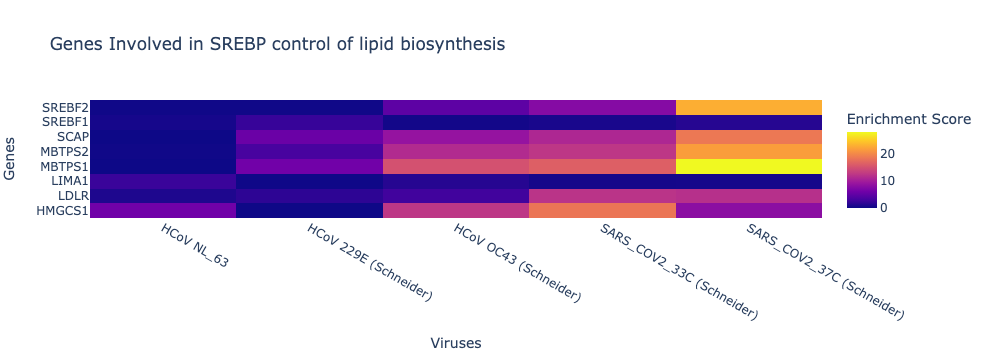

In [78]:
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

import plotly.graph_objects as go

heatmap_data = df_to_plotly(sch_df)

fig = go.Figure(data=go.Heatmap(heatmap_data, colorbar={"title": "Enrichment Score"}))

fig.update_layout(
    title = 'Genes Involved in SREBP control of lipid biosynthesis',
    xaxis_title = 'Viruses',
    yaxis_title = 'Genes')

fig.show()

Alternatives: Heatmap table?

### Part 3: Create a function to make heatmap for any genes

QUESTIONS:
1. How to select genes for heatmap?
* // Average Enrichment scores across genes, and selected highest n genes? 
* // Standard dev? 
* Top_ES for one virus?

* By type of pathway? => Compile genes for distinct pathways via lit review. Client select pathway.

=> Ask Andreas for possible lists.

=> High p-value + Significant FC

In [ ]:
def create_heatmap_df(ES_df, list_of_viruses, top_n):
    """
    ARGS:
    * ES_df: enrichment scores dataframe
    * list_of_viruses: list of virus names from columns of ES_df that you want to compare. 
    """

    

In [ ]:
def plot_heatmap():
    